In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
Read=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SHAI_Week-3/Salary dataset/Data Science Salaries.csv")
df=pd.DataFrame(Read)
df=df.iloc[:, 1:]

# **First EDA**

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## **Key words**
work_year	: The year the salary was paid.
experience_level	The experience level in the job during the year with the following possible values:
EN Entry-level /
Junior MI Mid-level /
Intermediate SE Senior-level /
Expert EX Executive-level /
Director employment_type
The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
job_title	The role worked in during the year.
salary	The total gross salary amount paid.
salary_currency	The currency of the salary paid as an ISO 4217 currency code.
salary_in_usd	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
employee_residence	Employee's primary country of residence in during the work year as an ISO 3166 country code.
remote_ratio	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
company_location	The country of the employer's main office or contracting branch as an ISO 3166 country code.
company_size	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [ ]:
df["salary_in_usd"].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [ ]:
T_salalry=df["salary_in_usd"]
df[T_salalry==T_salalry.max()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L


In [ ]:
T_salalry=df["salary_in_usd"]
df[T_salalry==T_salalry.min()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
176,2021,MI,FT,Data Scientist,58000,MXN,2859,MX,0,MX,S


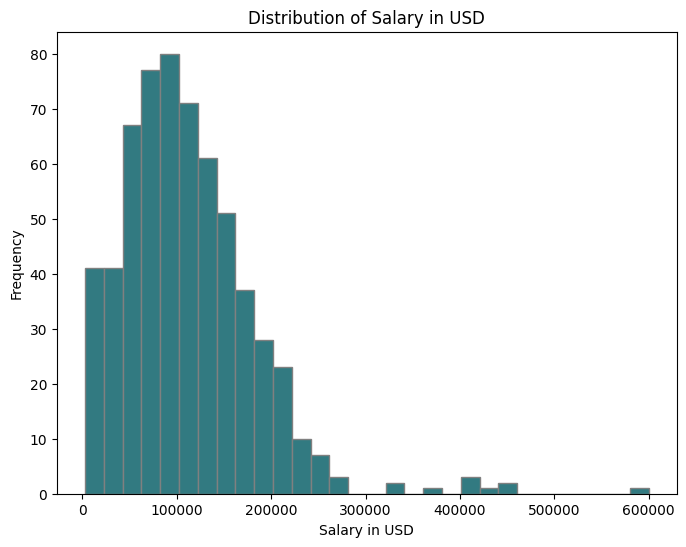

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df["salary_in_usd"],bins=30,edgecolor="gray",color="#327A81")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.title("Distribution of Salary in USD")
plt.show()

## **Conclusion**

*  Max present in USA: 600000 -Principal Data Engineer

*   Min present in Mexico : 2856 -Data Scientist

* Most of the data is  under 150000


# **1.Salary**

## Work Year-Salary relation

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

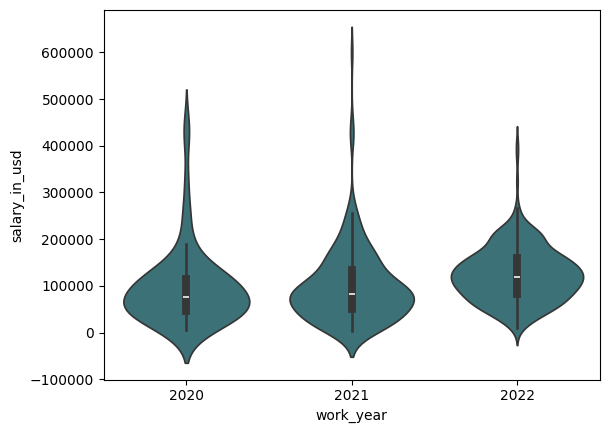

In [ ]:
sns.violinplot(data= df,x=df["work_year"],y=df["salary_in_usd"],color="#327A81")

In [ ]:
df["work_year"].corr(df["salary_in_usd"])
#salaries tend to increase over the years, but the relationship is weak

0.1704933245533278

### **Conclusion**

*   Salaries increase
*   STD decrease wich indicate promising future




## **Experience_level-Salary relation**

In [ ]:
df.groupby("experience_level").describe()["salary_in_usd"]

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.318182,44395.541126,4000.0,27505.0,56500.0,85425.75,250000.0
EX,26.0,199392.038462,117071.255697,69741.0,130006.5,171437.5,233750.00,600000.0
MI,213.0,87996.056338,63901.057478,2859.0,48000.0,76940.0,112000.00,450000.0
SE,280.0,138617.292857,57691.978337,18907.0,100000.0,135500.0,170000.00,412000.0


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

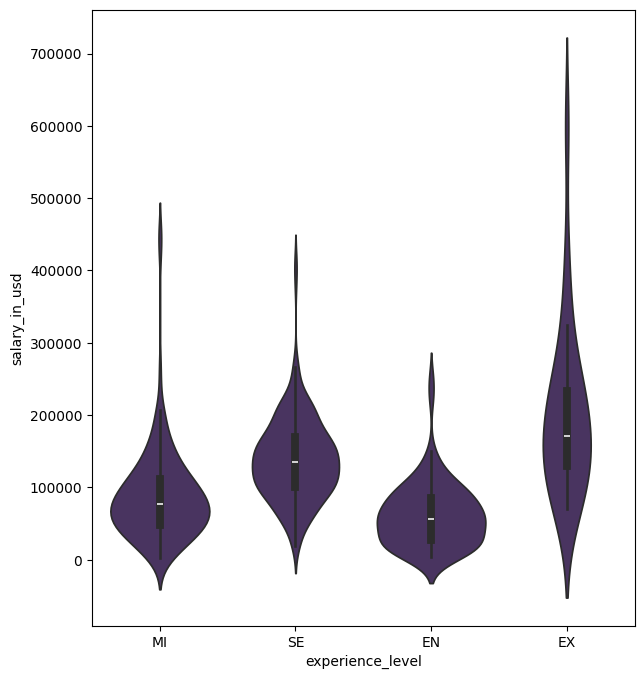

In [ ]:
plt.figure(figsize=(7,8))
sns.violinplot(data=df,x="experience_level",y="salary_in_usd",color="#492C68")

### **Conclusion**


*   Most of Data jobs for seniors-the least std indicate the least variation in salary unlike Executive level salary which vary with the least number


 EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director employment_type

## **Employment_type-Salary relation**

In [ ]:
df.groupby("employment_type").describe()["salary_in_usd"]

,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.000000,156250.889997,31875.0,100000.00,105000.0,270000.0,416000.0
FL,4.0,48000.000000,40529.824410,12000.0,18000.00,40000.0,70000.0,100000.0
FT,588.0,113468.073129,69476.470098,2859.0,64962.25,104196.5,150000.0,600000.0
PT,10.0,33070.500000,31472.907966,5409.0,12000.00,18817.5,48370.0,100000.0


<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

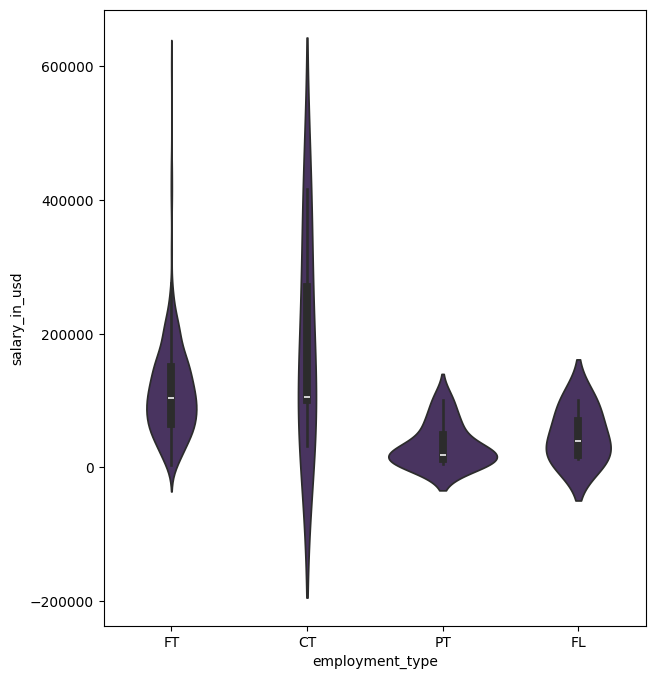

In [ ]:
plt.figure(figsize=(7,8))
sns.violinplot(data= df,x="employment_type",y="salary_in_usd",color="#492C68")
#PT Part-time FT Full-time CT Contract FL Freelance

### **Conclusion**

*   Almost All the data jobs are full time jobs




PT Part-time FT Full-time CT Contract FL Freelance

## **Job_title-Salary relation**

In [ ]:
df.groupby("job_title").describe()["salary_in_usd"]

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,1.0,5409.000000,NaN,5409.0,5409.00,5409.0,5409.00,5409.0
AI Scientist,7.0,66135.571429,70152.164338,12000.0,15026.50,45896.0,87500.00,200000.0
Analytics Engineer,4.0,175000.000000,29508.077990,135000.0,165000.00,179850.0,189850.00,205300.0
Applied Data Scientist,5.0,175655.000000,123647.186470,54238.0,110037.00,157000.0,177000.00,380000.0
Applied Machine Learning Scientist,4.0,142068.750000,188246.696933,31875.0,36768.75,56700.0,162000.00,423000.0
BI Data Analyst,6.0,74755.166667,50989.558548,9272.0,40944.25,76500.0,99500.00,150000.0
Big Data Architect,1.0,99703.000000,NaN,99703.0,99703.00,99703.0,99703.00,99703.0
Big Data Engineer,8.0,51974.000000,42954.761263,5882.0,17557.00,41305.5,79756.00,114047.0
Business Data Analyst,5.0,76691.200000,43814.851149,18442.0,59102.00,70912.0,100000.00,135000.0


<ipython-input-81-05f00118c210>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='job_title',x=df["salary_in_usd"], palette='viridis', order=df['job_title'].value_counts().index)


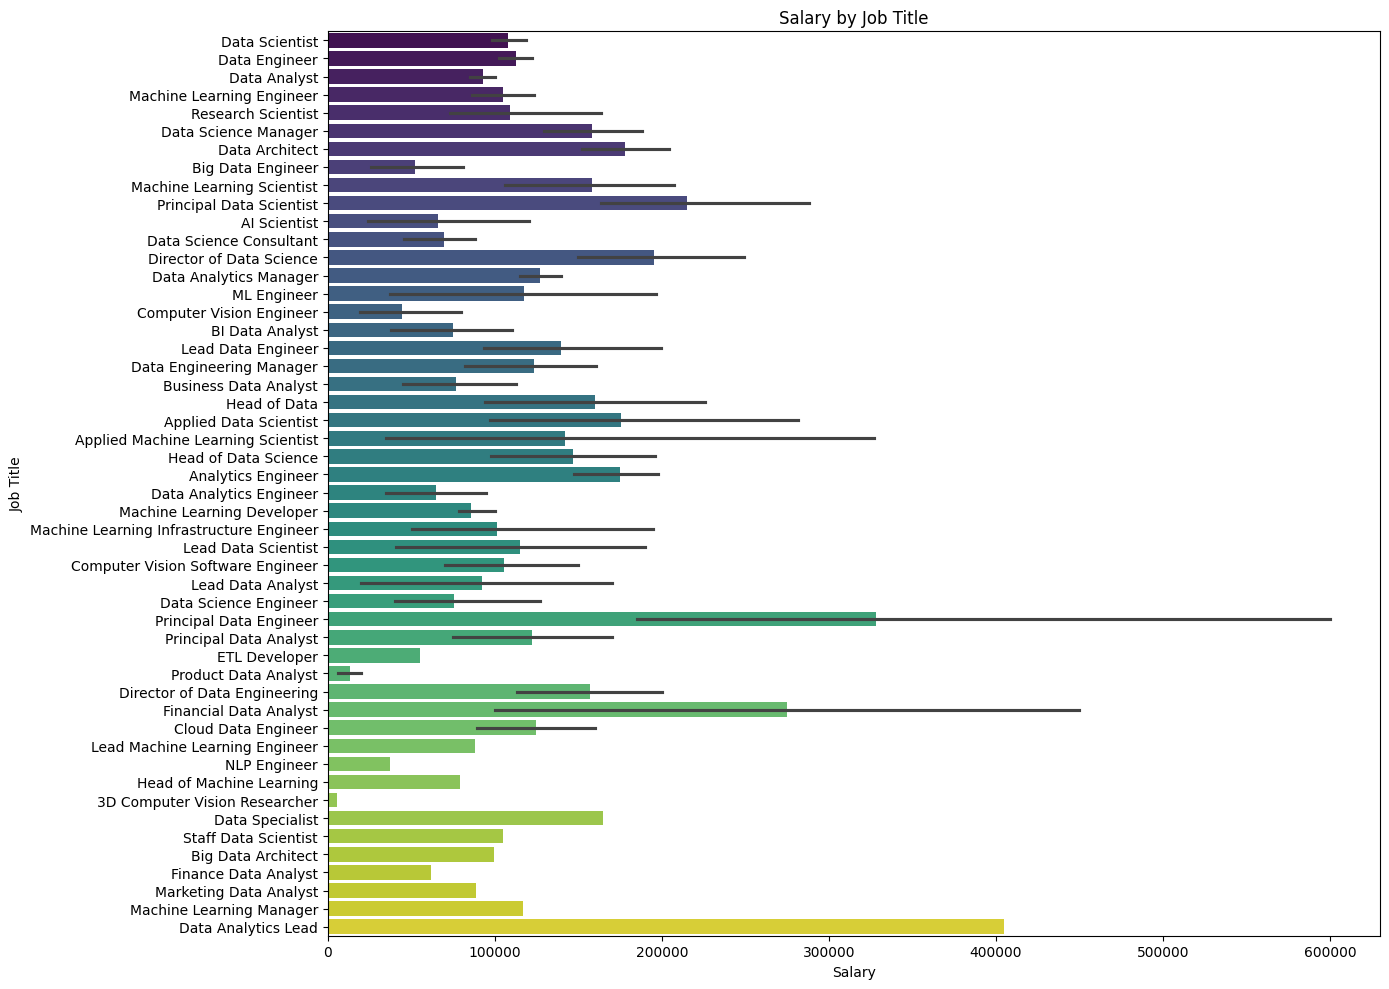

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot(data=df, y='job_title',x=df["salary_in_usd"], palette='viridis', order=df['job_title'].value_counts().index)
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.title('Salary by Job Title')
plt.tight_layout()
plt.show()

<ipython-input-82-f341adcbd8c5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=toptenjobs, x="job_title",y="salary_in_usd", palette='viridis',order=toptentitles)


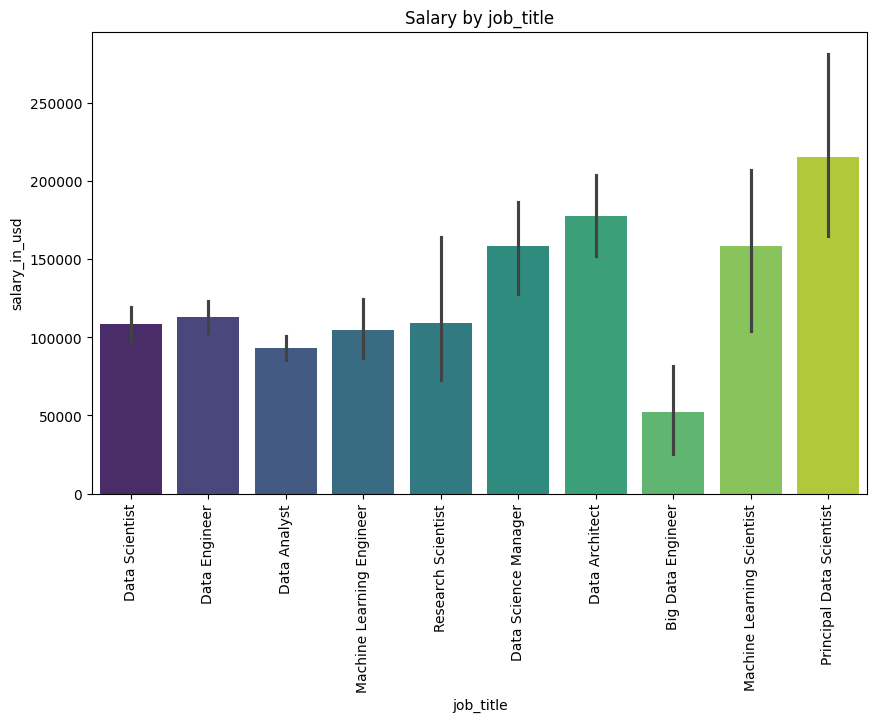

In [ ]:
plt.figure(figsize=(10, 6))
toptentitles=df["job_title"].value_counts().nlargest(10).index
toptenjobs=df[df["job_title"].isin(toptentitles)]
sns.barplot(data=toptenjobs, x="job_title",y="salary_in_usd", palette='viridis',order=toptentitles)
plt.xlabel('job_title')
plt.ylabel('salary_in_usd')
plt.title('Salary by job_title')
plt.xticks(rotation=90)
plt.show()

### **Conclusion**
The previous plot is the top ten data job (number)

## **Employee_residence-Salary relation**

In [ ]:
df.groupby("employee_residence").describe()["salary_in_usd"]

,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
AE,3.0,100000.000000,30413.812651,65000.0,90000.00,115000.0,117500.00,120000.0
AR,1.0,60000.000000,NaN,60000.0,60000.00,60000.0,60000.00,60000.0
AT,3.0,76738.666667,13386.018539,64849.0,69489.50,74130.0,82683.50,91237.0
AU,3.0,108042.666667,36337.909768,86703.0,87064.00,87425.0,118712.50,150000.0
BE,2.0,85699.000000,4179.001077,82744.0,84221.50,85699.0,87176.50,88654.0
BG,1.0,80000.000000,NaN,80000.0,80000.00,80000.0,80000.00,80000.0
BO,1.0,75000.000000,NaN,75000.0,75000.00,75000.0,75000.00,75000.0
BR,6.0,54634.666667,61537.353923,12000.0,14402.50,21453.5,81000.00,160000.0
CA,29.0,97085.310345,39767.443731,52000.0,70912.00,85000.0,117104.00,196979.0


<ipython-input-84-527dd08507c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='employee_residence',x=df["salary_in_usd"], palette='viridis', order=df['employee_residence'].value_counts().index)


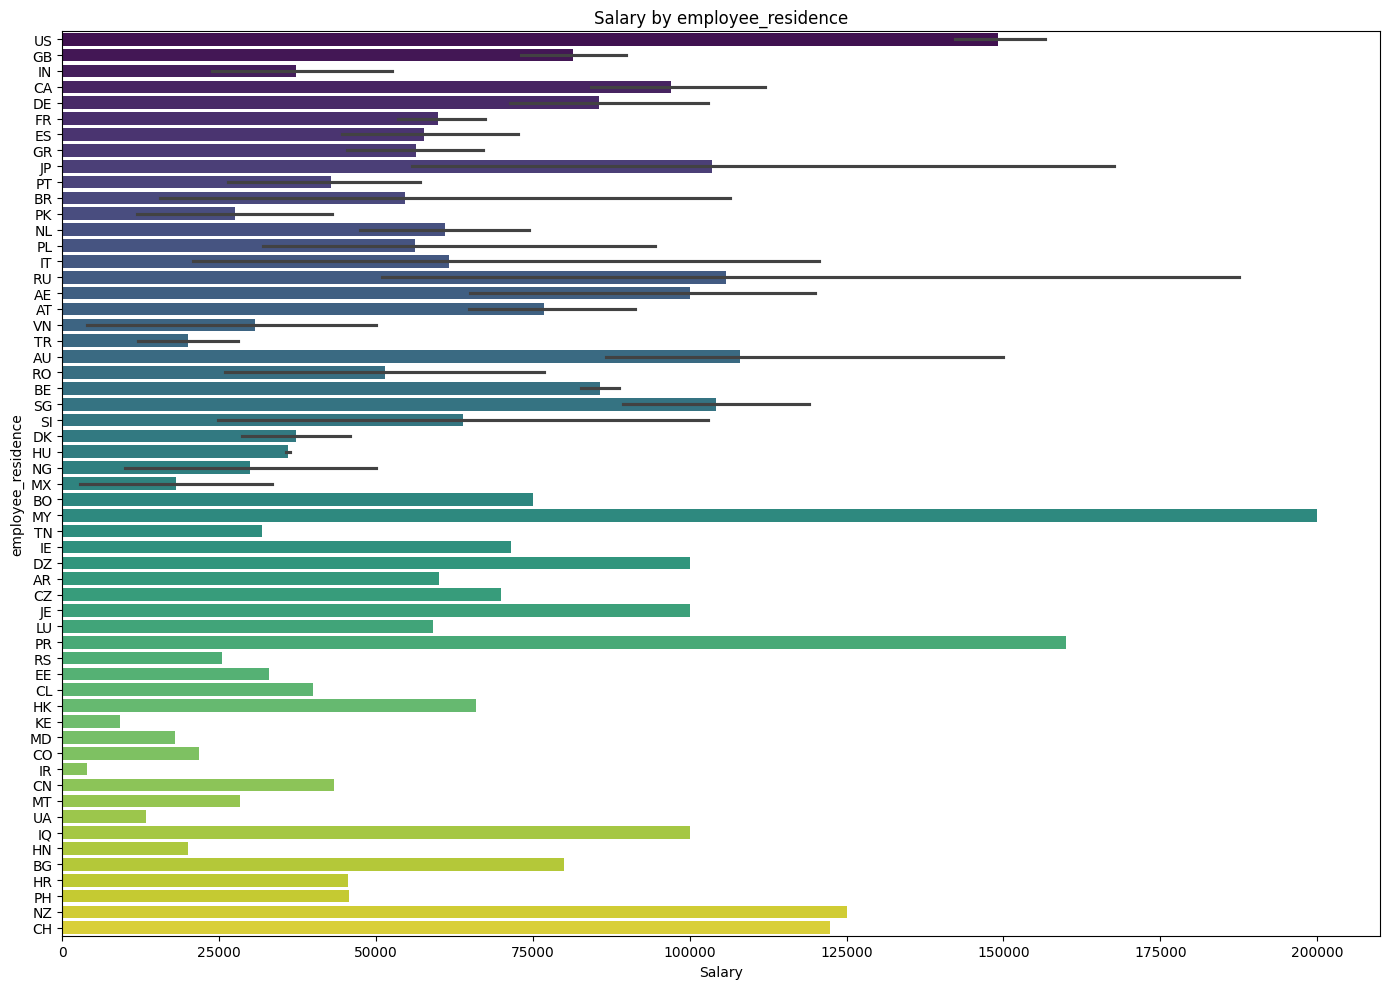

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot(data=df, y='employee_residence',x=df["salary_in_usd"], palette='viridis', order=df['employee_residence'].value_counts().index)
plt.xlabel('Salary')
plt.ylabel('employee_residence')
plt.title('Salary by employee_residence')
plt.tight_layout()
plt.show()

<ipython-input-85-6c1371959caf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=toptenresidence, x="employee_residence",y="salary_in_usd", palette='viridis',order=toptentitles)


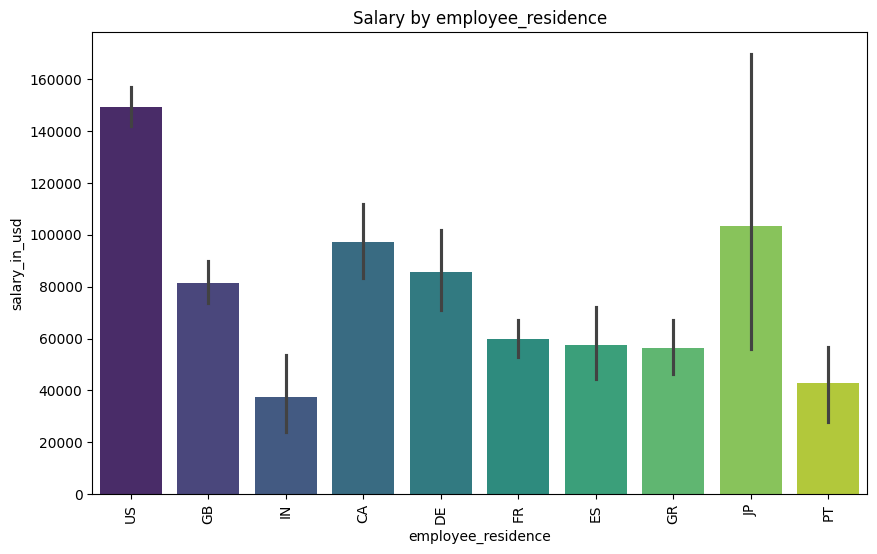

In [ ]:
plt.figure(figsize=(10, 6))
toptentitles=df["employee_residence"].value_counts().nlargest(10).index
toptenresidence=df[df["employee_residence"].isin(toptentitles)]
sns.barplot(data=toptenresidence, x="employee_residence",y="salary_in_usd", palette='viridis',order=toptentitles)
plt.xlabel('employee_residence')
plt.ylabel('salary_in_usd')
plt.title('Salary by employee_residence')
plt.xticks(rotation=90)
plt.show()

### **Conclusion**
The previous plot is the top ten data cxountry (number)

## **Remote_ratio-Salary relation**

In [ ]:
df.groupby("remote_ratio").describe()["salary_in_usd"]

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,127.0,106354.622047,67724.540800,2859.0,60000.0,99000.0,140400.0,450000.0
50,99.0,80823.030303,57353.093614,5409.0,50355.0,69999.0,99851.5,423000.0
100,381.0,122457.454068,72710.843718,4000.0,75774.0,115000.0,160000.0,600000.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


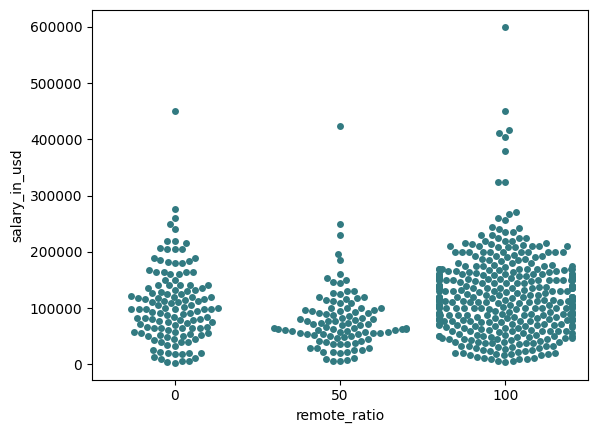

In [ ]:
sns.swarmplot(data=df,x="remote_ratio",y="salary_in_usd",color="#327A81")

In [ ]:
df["remote_ratio"].corr(df["salary_in_usd"])
#salaries tend to increase over the remote work, but the relationship is weak

0.13212233539422094

### **Conclusion**

Most of jobs are remote and 75% of them have 160000 USD

## **Company_location-Salary relation**

In [ ]:
df.groupby("company_location").describe()["salary_in_usd"]

,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
AE,3.0,100000.000000,30413.812651,65000.0,90000.00,115000.0,117500.00,120000.0
AS,1.0,18053.000000,NaN,18053.0,18053.00,18053.0,18053.00,18053.0
AT,4.0,72920.750000,13332.777114,61467.0,64003.50,69489.5,78406.75,91237.0
AU,3.0,108042.666667,36337.909768,86703.0,87064.00,87425.0,118712.50,150000.0
BE,2.0,85699.000000,4179.001077,82744.0,84221.50,85699.0,87176.50,88654.0
BR,3.0,18602.666667,5555.755064,12901.0,15904.00,18907.0,21453.50,24000.0
CA,30.0,99823.733333,46329.101553,52000.0,69730.00,81895.5,117916.25,225000.0
CH,2.0,64114.000000,82352.484164,5882.0,34998.00,64114.0,93230.00,122346.0
CL,1.0,40038.000000,NaN,40038.0,40038.00,40038.0,40038.00,40038.0


<Axes: xlabel='company_location', ylabel='salary_in_usd'>

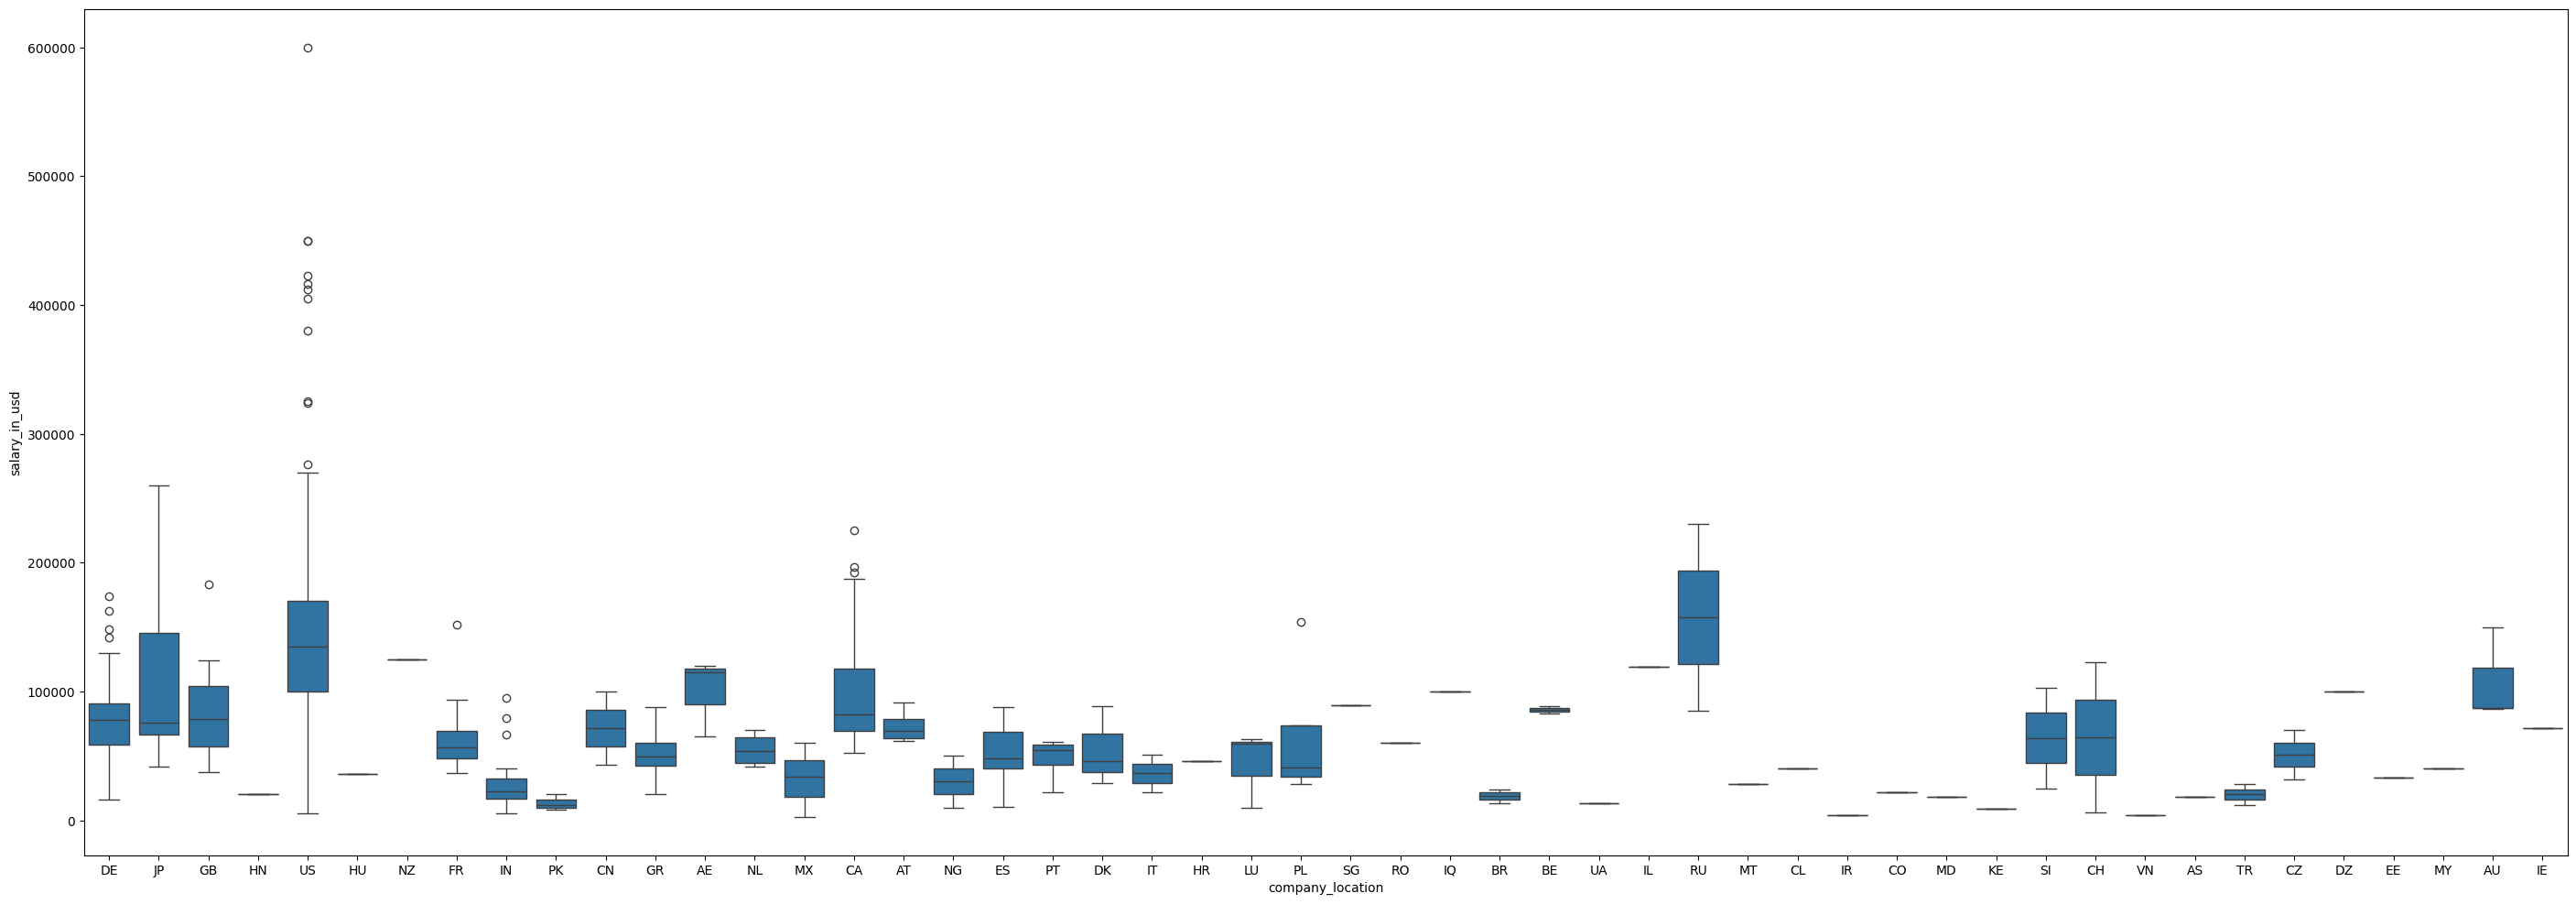

In [ ]:
plt.figure(figsize=(35,12))
sns.boxplot(data=df,x="company_location",y="salary_in_usd")

<ipython-input-91-cc55db3d479a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='company_location',x=df["salary_in_usd"], palette='viridis', order=df['company_location'].value_counts().index)


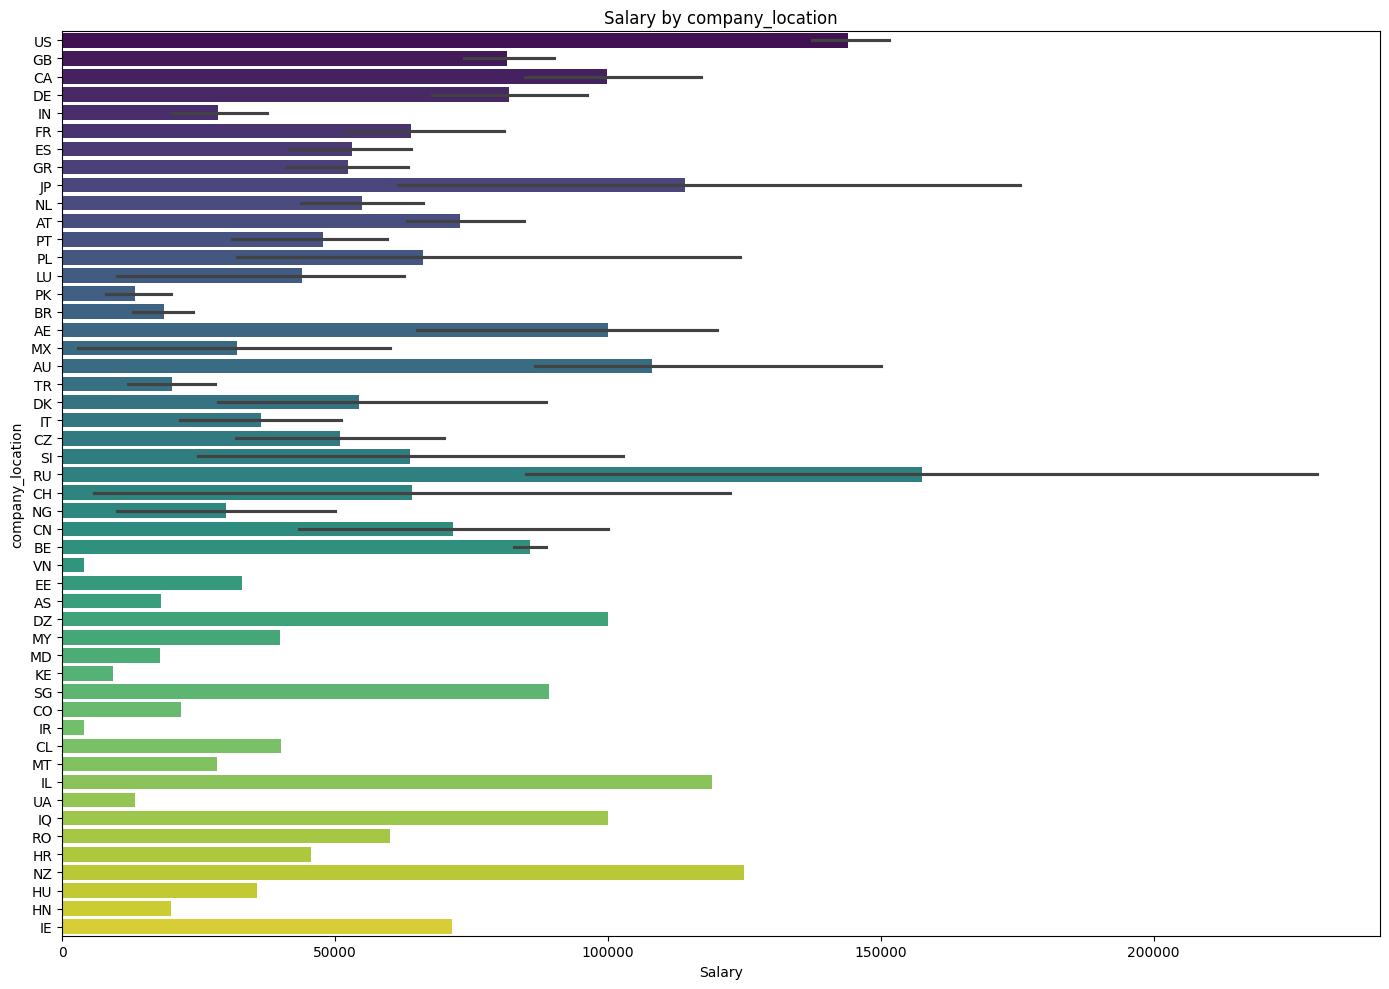

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot(data=df, y='company_location',x=df["salary_in_usd"], palette='viridis', order=df['company_location'].value_counts().index)
plt.xlabel('Salary')
plt.ylabel('company_location')
plt.title('Salary by company_location')
plt.tight_layout()
plt.show()

<ipython-input-92-c64c8a26c263>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=toptenlocation, x="company_location",y="salary_in_usd", palette='viridis',order=toptentitles)


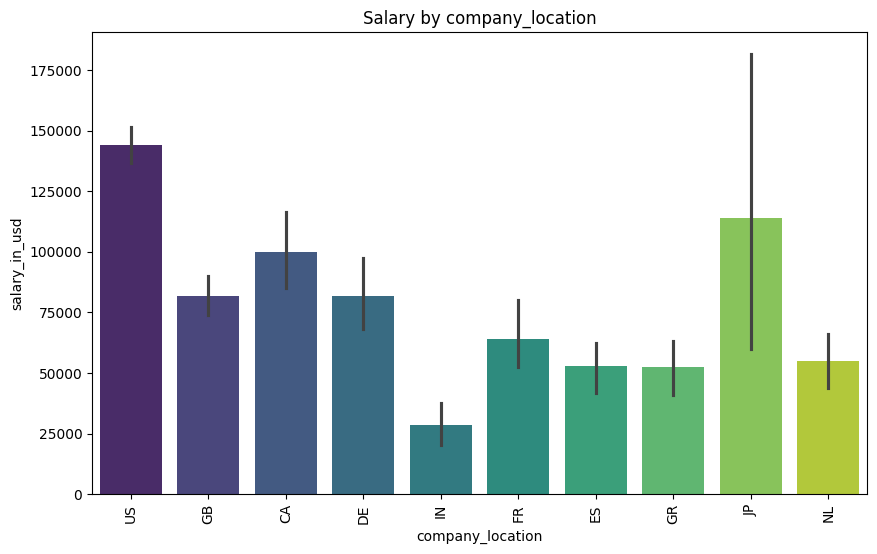

In [ ]:
plt.figure(figsize=(10, 6))
toptentitles=df["company_location"].value_counts().nlargest(10).index
toptenlocation=df[df["company_location"].isin(toptentitles)]
sns.barplot(data=toptenlocation, x="company_location",y="salary_in_usd", palette='viridis',order=toptentitles)
plt.xlabel('company_location')
plt.ylabel('salary_in_usd')
plt.title('Salary by company_location')
plt.xticks(rotation=90)
plt.show()

### **Conclusion**
The previous plot is the top ten data country location (number)


## **Company_size-Salary relation**

In [ ]:
df.groupby("company_size").describe()["salary_in_usd"]

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,198.0,119242.994949,86156.740692,5882.0,61041.75,100000.0,154600.0,600000.0
M,326.0,116905.466258,59287.694614,4000.0,78131.50,113188.0,152875.0,450000.0
S,83.0,77632.674699,63461.706497,2859.0,41943.00,65000.0,100000.0,416000.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='company_size', ylabel='salary_in_usd'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


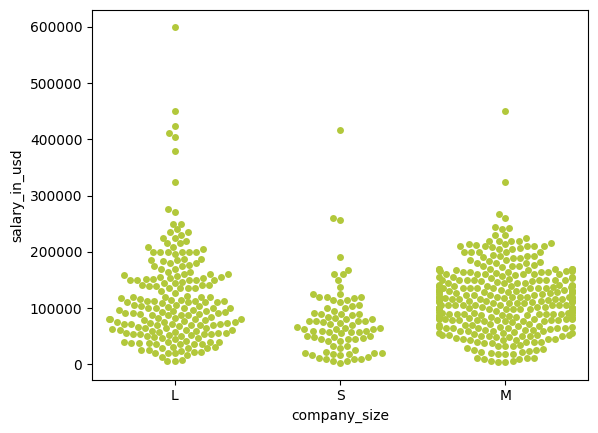

In [ ]:
sns.swarmplot(data=df,x="company_size",y="salary_in_usd",color="#B2C83B")

### **Conclusion**

*   Most of Data Companies are Medium with mean of 116905 USD

*   No huge difference between L,M

# **2.Counts**

## **Count of Employees per jobtitle**

<ipython-input-95-f8ff5c718b8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='job_title', palette='viridis', order=df['job_title'].value_counts().index)


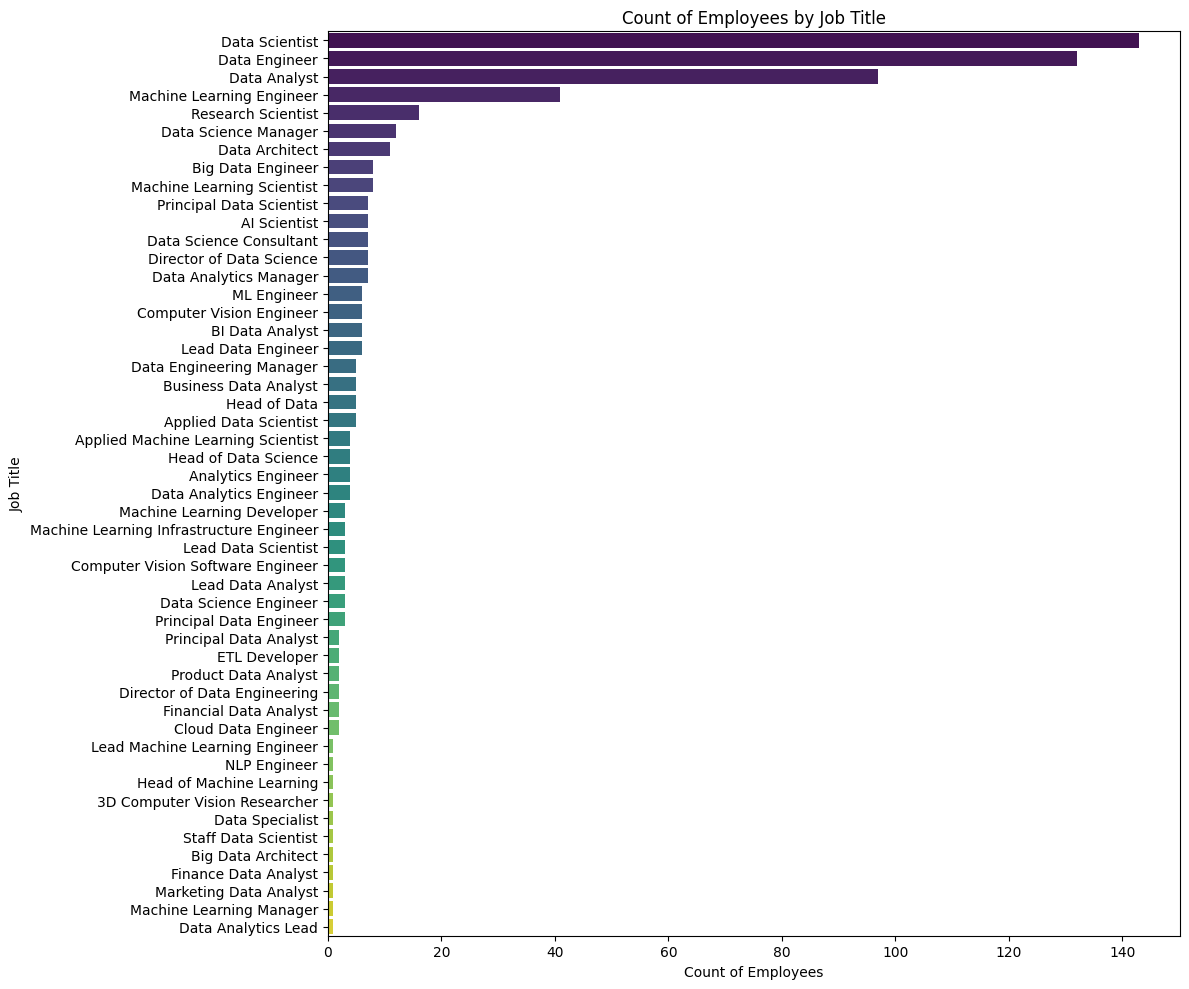

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df, y='job_title', palette='viridis', order=df['job_title'].value_counts().index)
plt.xlabel('Count of Employees')
plt.ylabel('Job Title')
plt.title('Count of Employees by Job Title')
plt.tight_layout()
plt.show()

<ipython-input-96-608b2e4a7feb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=toptenjobs, x="job_title", palette='viridis',order=toptentitles)


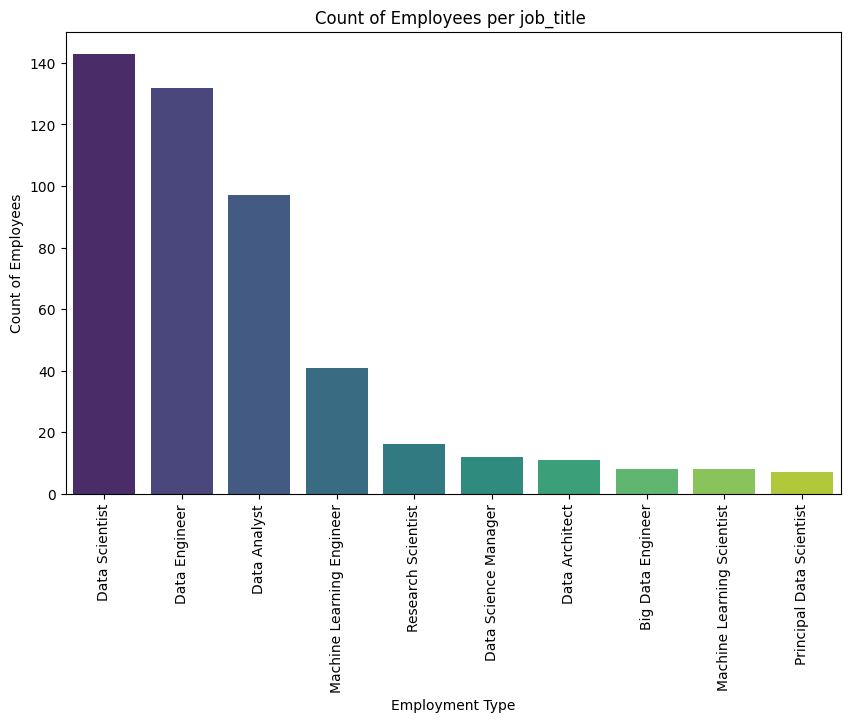

In [ ]:
plt.figure(figsize=(10, 6))
toptentitles=df["job_title"].value_counts().nlargest(10).index
toptenjobs=df[df["job_title"].isin(toptentitles)]
sns.countplot(data=toptenjobs, x="job_title", palette='viridis',order=toptentitles)
plt.xlabel('Employment Type')
plt.ylabel('Count of Employees')
plt.title("Count of Employees per job_title ")
plt.xticks(rotation=90)
plt.show()

### **Conclusion**

The previous plot demostrate the top ten employment type(number)

##**Count of Employees per company_location**




<ipython-input-97-b306bf679b56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='company_location', palette='viridis', order=df['company_location'].value_counts().index)


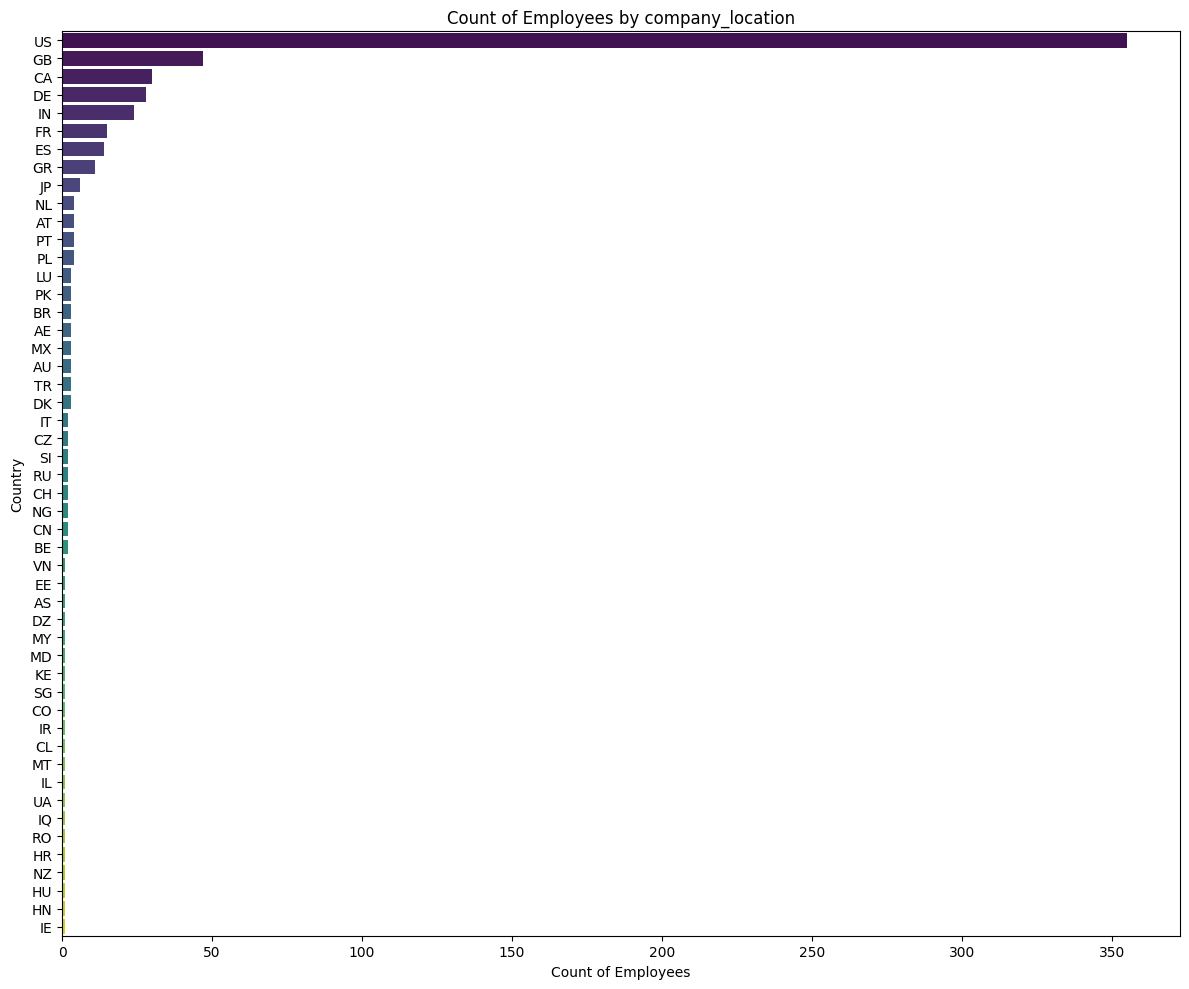

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df, y='company_location', palette='viridis', order=df['company_location'].value_counts().index)
plt.xlabel('Count of Employees')
plt.ylabel('Country')
plt.title('Count of Employees by company_location')
plt.tight_layout()
plt.show()

<ipython-input-98-0ca8a85ccc47>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=toptenlocation, x="company_location", palette='viridis',order=toptentitles)


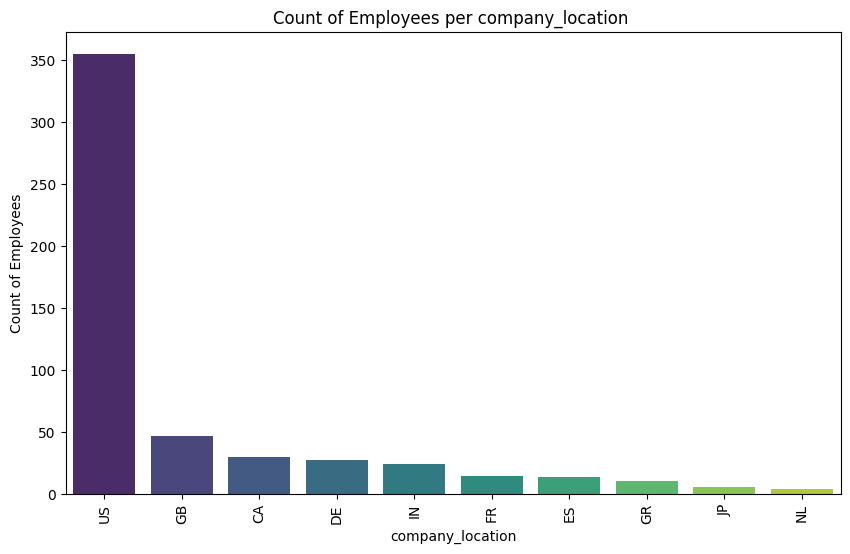

In [ ]:
plt.figure(figsize=(10, 6))
toptentitles=df["company_location"].value_counts().nlargest(10).index
toptenlocation=df[df["company_location"].isin(toptentitles)]
sns.countplot(data=toptenlocation, x="company_location", palette='viridis',order=toptentitles)
plt.xlabel('company_location')
plt.ylabel('Count of Employees')
plt.title("Count of Employees per company_location ")
plt.xticks(rotation=90)
plt.show()

### **Conclusion**
The previous plot demostrate the top ten company_location(number)

## **Count of Employees by experience_level**

<ipython-input-99-1fe52276f4d8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='experience_level', palette='viridis', order=df['experience_level'].value_counts().index)


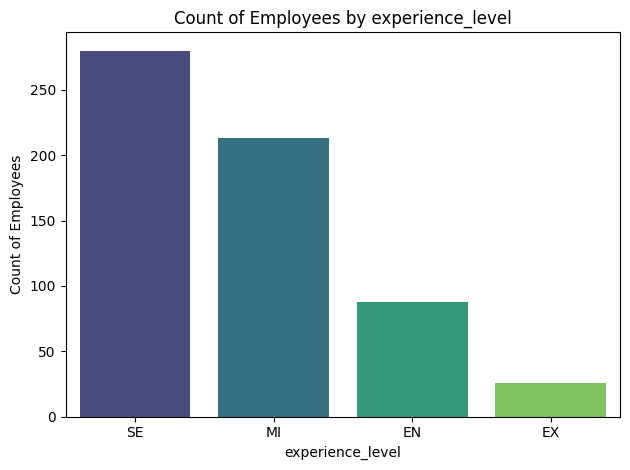

In [ ]:
sns.countplot(data=df, x='experience_level', palette='viridis', order=df['experience_level'].value_counts().index)
plt.xlabel('experience_level')
plt.ylabel('Count of Employees')
plt.title('Count of Employees by experience_level')
plt.tight_layout()
plt.show()
#The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level /
#Intermediate SE Senior-level / Expert EX Executive-level / Director


### Conclusion
Most of Employees are  in senior level

## **Count of Employees by company_size**

<ipython-input-100-aac715a5df73>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='company_size', palette='viridis', order=df['company_size'].value_counts().index)


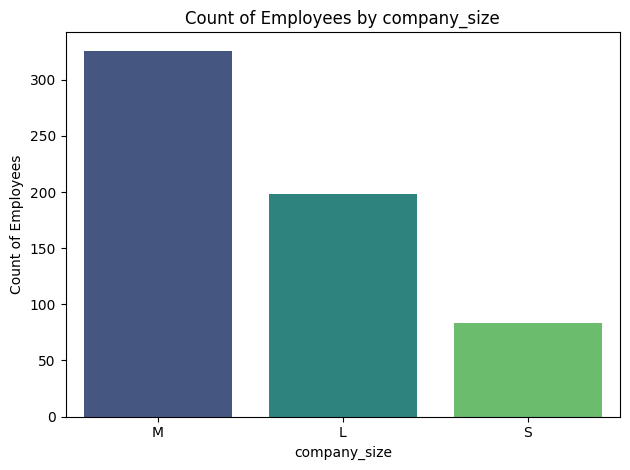

In [ ]:
sns.countplot(data=df, x='company_size', palette='viridis', order=df['company_size'].value_counts().index)
plt.xlabel('company_size')
plt.ylabel('Count of Employees')
plt.title('Count of Employees by company_size')
plt.tight_layout()
plt.show()

### **Conclusion**
Most of data ompanies are medium

# **3.Frequency**

## **RemoteType-Year**

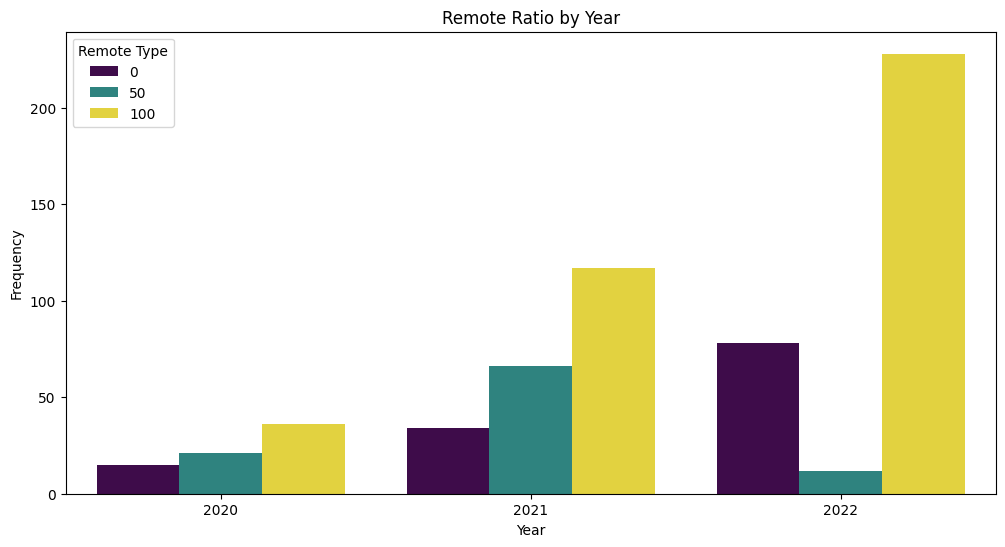

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='work_year', hue='remote_ratio', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Remote Ratio by Year')
plt.legend(title='Remote Type')
plt.show()

### **Conclusion**
Ratio of Remote work increase after 2020 (COVID)

## **RemoteType-Experience Level**

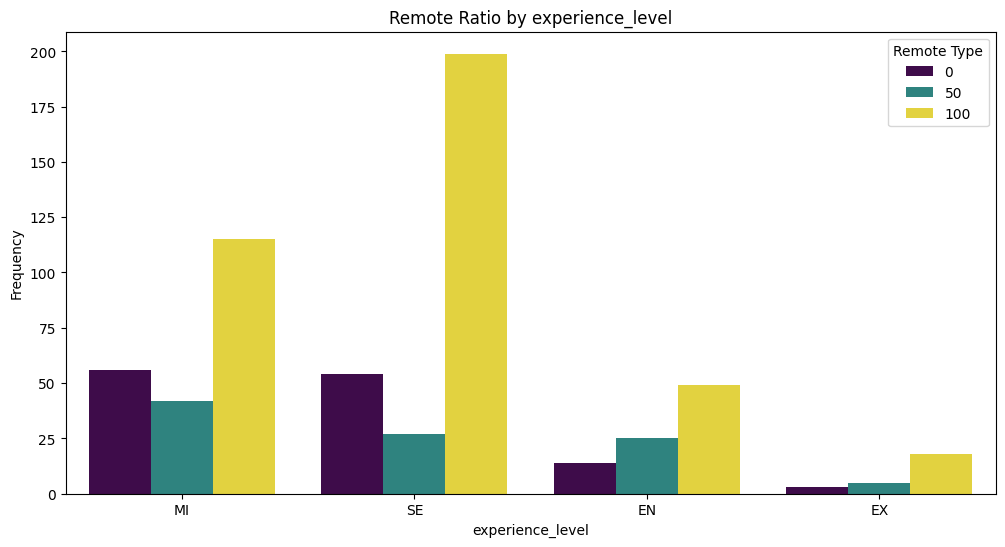

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='experience_level', hue='remote_ratio', palette='viridis')
plt.xlabel('experience_level')
plt.ylabel('Frequency')
plt.title('Remote Ratio by experience_level')
plt.legend(title='Remote Type')
plt.show()

### **Conclusion**
The highest remote ratio are the senior data jobs

## **Experience_level-Company_size**

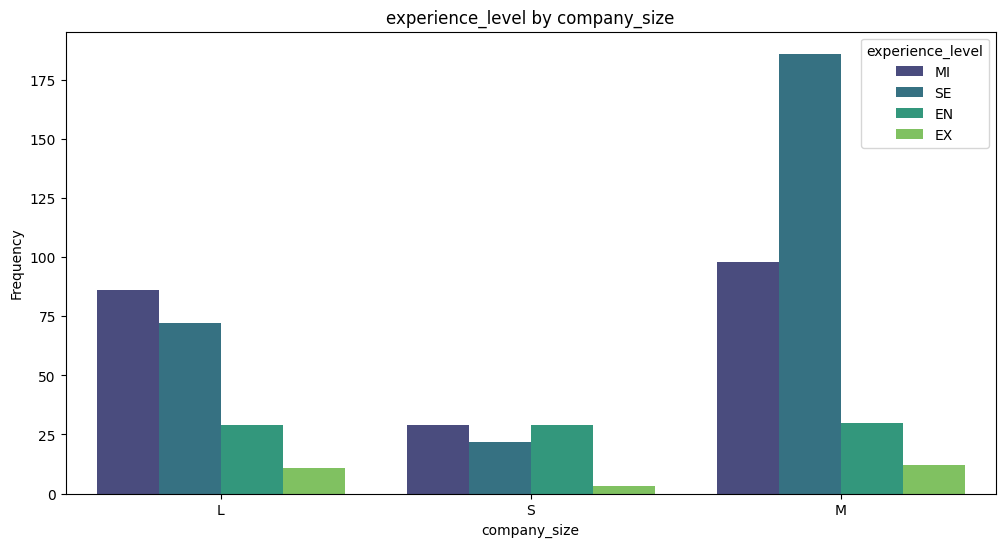

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='company_size', hue='experience_level', palette='viridis')
plt.xlabel('company_size')
plt.ylabel('Frequency')
plt.title('experience_level by company_size')
plt.legend(title='experience_level')
plt.show()

### **Conclusion**
Medium companies have the highest number of employee with a majority of senior level data jobs

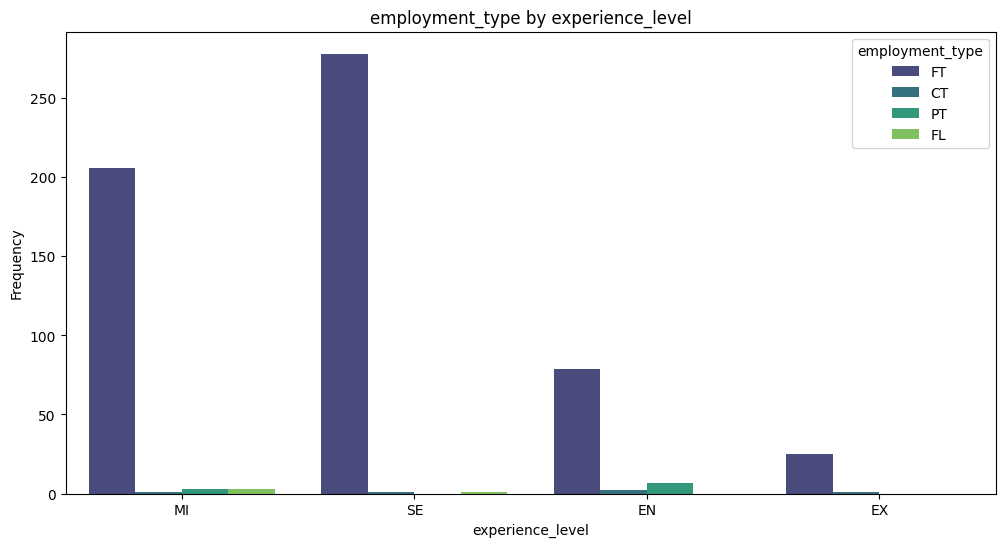

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='experience_level', hue='employment_type', palette='viridis')
plt.xlabel('experience_level')
plt.ylabel('Frequency')
plt.title('employment_type by experience_level')
plt.legend(title='employment_type')
plt.show()

## **Experience_level-Company_location**

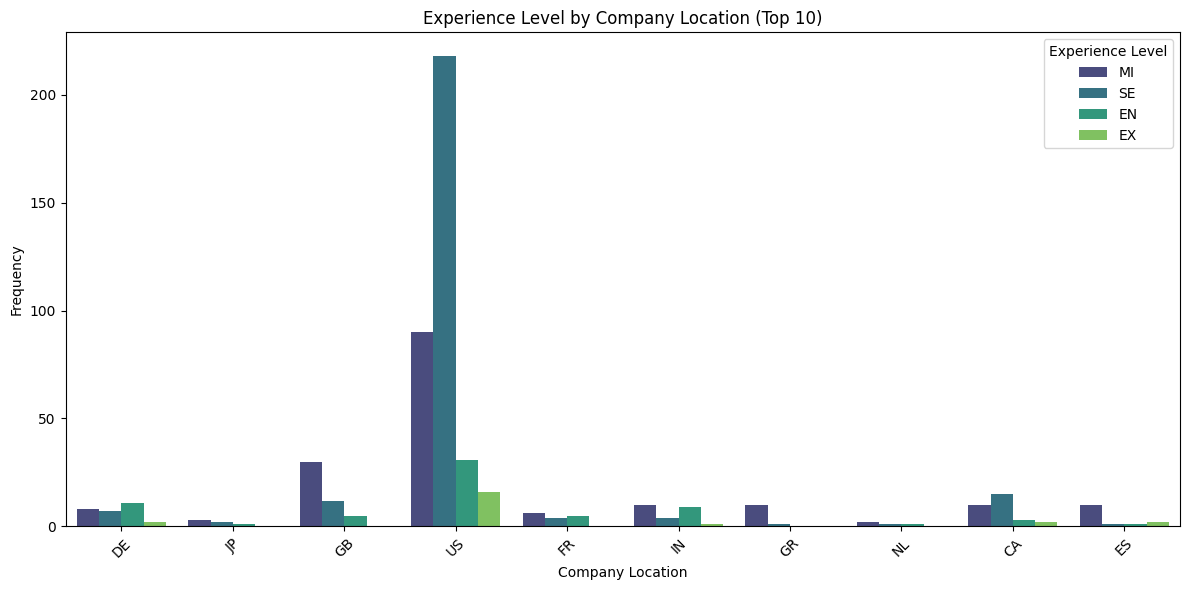

In [ ]:
top_ten_locations = df['company_location'].value_counts().nlargest(10).index
df_top_ten_locations = df[df['company_location'].isin(top_ten_locations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_ten_locations, x='company_location', hue='experience_level', palette='viridis')
plt.xlabel('Company Location')
plt.ylabel('Frequency')
plt.title('Experience Level by Company Location (Top 10)')
plt.legend(title='Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Conclusion**
US have the highest number of Middle, senior level data jobs

<ipython-input-106-898602e45c36>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu_r')


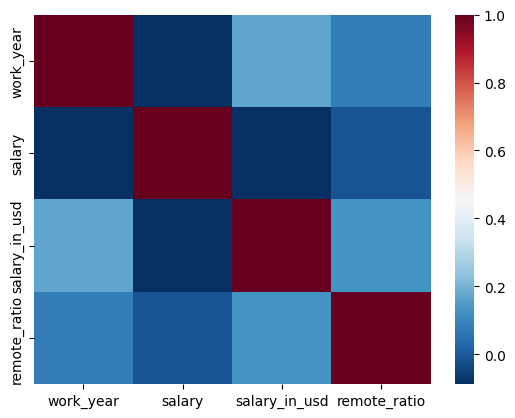

In [ ]:
sns.heatmap(df.corr(), cmap='RdBu_r')
plt.show()
#no_siginificant_relations

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')